In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install stopwords

In [56]:
df=pd.read_csv('IMDB Dataset.csv')

In [57]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [58]:
# One review
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# **Text Cleaning**

1. Sample 10,000 rows
2. Remove html tags
3. Converting every thing to lower case
4. Remove special characters
5. Removing Stop words
6. Stemming

In [59]:
#1
df=df.sample(100)

In [60]:
df.shape

(100, 2)

In [61]:
df.info()
#Clearly seem that here is no missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 43870 to 16175
Data columns (total 2 columns):
review       100 non-null object
sentiment    100 non-null object
dtypes: object(2)
memory usage: 2.3+ KB


In [62]:
df['sentiment'].replace({'positive': 1, 'negative': 0}, inplace= True)

In [63]:
df.head()

,review,sentiment
43870,Dev Anand (or Prashant) and Zeenat Aman ( Jasb...,1
17213,A movie of outstanding brilliance and a poigna...,1
42098,"(spoilers) Horrifyingly enough, I have actuall...",0
18353,"We all knew even before it aired, the Ron Moor...",0
36106,How to Lose Friends & Alienate People is in al...,1


In [64]:
#2
# Using regex library to remove html tags
import re
clean=re.compile('<.*?>')
print(df.iloc[2].review)
# Test After Cleaning of one data
re.sub(clean,'',df.iloc[2].review)

(spoilers) Horrifyingly enough, I have actually SEEN the film that this horrid film was a sequel to. It was called Ator the Fighting Eagle, and I saw it when I was just 8 years old. It made such an awful impression on me that i never forgot it. I've been an MST3K fan for a long time, so when Cavedwellers came out on tape I bought it. I was horrified to realize that it was a sequel to the wretched Ator movie that i'd seen so long ago! Ator's costume has, somehow, gotten ever skimpier than the last time i saw him. How can he wear that tiny little bikini? Doesn't he care that it shows off the fact that he has no...errr...package? And poor Thong...he gets no lines and no girl, and has to follow that frizzy haired girly doofus Ator around all the time. Has anyone else noticed that Miles O'Keefe walks like a woman? No wonder he's not interested in the pretty if somewhat lackluster Meela. The evil but prancy bad guy Zor is more to his taste, I'm sure. I loved Zor's cardboard spray painted swa

"(spoilers) Horrifyingly enough, I have actually SEEN the film that this horrid film was a sequel to. It was called Ator the Fighting Eagle, and I saw it when I was just 8 years old. It made such an awful impression on me that i never forgot it. I've been an MST3K fan for a long time, so when Cavedwellers came out on tape I bought it. I was horrified to realize that it was a sequel to the wretched Ator movie that i'd seen so long ago! Ator's costume has, somehow, gotten ever skimpier than the last time i saw him. How can he wear that tiny little bikini? Doesn't he care that it shows off the fact that he has no...errr...package? And poor Thong...he gets no lines and no girl, and has to follow that frizzy haired girly doofus Ator around all the time. Has anyone else noticed that Miles O'Keefe walks like a woman? No wonder he's not interested in the pretty if somewhat lackluster Meela. The evil but prancy bad guy Zor is more to his taste, I'm sure. I loved Zor's cardboard spray painted sw

In [65]:
#Function to clean html tags
def clean_html(text):
    clean=re.compile('<.*?>')
    return re.sub(clean,'',text)

In [66]:
df['review']=df['review'].apply(clean_html)

In [67]:
#3
#converting everything to lower
def convert_lower(text):
    return text.lower()

In [68]:
df['review']=df['review'].apply(convert_lower)

In [69]:
#4
#function to remove special characters
def remove_special(text):
    x=''
    
    for i in text:
        #checking is the character in the given string is alphanumeric or not
        if i.isalnum(): 
            x+=i
        else:
            x+=' '
    return x

In [70]:
df['review']=df['review'].apply(remove_special)

In [71]:
# 5
# Remove the stop words
# using natural language tool kit and stopwords class
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\SUMON
[nltk_data]     DEY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [73]:

def remove_stopwords(text):
    x=[]
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y
            

In [74]:
df['review']=df['review'].apply(remove_stopwords)

In [75]:
df

,review,sentiment
43870,"[dev, anand, prashant, zeenat, aman, jasbir, j...",1
17213,"[movie, outstanding, brilliance, poignant, unu...",1
42098,"[spoilers, horrifyingly, enough, actually, see...",0
18353,"[knew, even, aired, ron, moore, mini, series, ...",0
36106,"[lose, friends, alienate, people, honesty, one...",1
25582,"[true, dark, noir, movie, graphic, film, nice,...",1
42676,"[plot, crappy, acting, pointless, gore, suppos...",0
3510,"[thinking, must, somesort, payback, gus, van, ...",0
41964,"[would, think, one, films, whose, director, re...",0
1913,"[hand, ten, star, ratings, easily, movie, real...",1


In [76]:
# 6
# Perform stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [77]:
def stem_words(text):
    y=[]
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    return z

In [78]:
stem_words(['I','Loved','Loving','it'])

['I', 'love', 'love', 'it']

In [79]:
df['review']=df['review'].apply(stem_words)

In [80]:
df

,review,sentiment
43870,"[dev, anand, prashant, zeenat, aman, jasbir, j...",1
17213,"[movi, outstand, brillianc, poignant, unusu, l...",1
42098,"[spoiler, horrifyingli, enough, actual, seen, ...",0
18353,"[knew, even, air, ron, moor, mini, seri, battl...",0
36106,"[lose, friend, alien, peopl, honesti, one, bes...",1
25582,"[true, dark, noir, movi, graphic, film, nice, ...",1
42676,"[plot, crappi, act, pointless, gore, suppos, h...",0
3510,"[think, must, somesort, payback, gu, van, sant...",0
41964,"[would, think, one, film, whose, director, rea...",0
1913,"[hand, ten, star, rate, easili, movi, realli, ...",1


In [81]:
#join back
def join_back(list_input):
    return " ".join(list_input)

In [82]:
df['review']=df['review'].apply(join_back)

In [83]:
df

,review,sentiment
43870,dev anand prashant zeenat aman jasbir janic si...,1
17213,movi outstand brillianc poignant unusu love st...,1
42098,spoiler horrifyingli enough actual seen film h...,0
18353,knew even air ron moor mini seri battlestar ga...,0
36106,lose friend alien peopl honesti one best comed...,1
25582,true dark noir movi graphic film nice storylin...,1
42676,plot crappi act pointless gore suppos horror m...,0
3510,think must somesort payback gu van sant one od...,0
41964,would think one film whose director read book ...,0
1913,hand ten star rate easili movi realli impress ...,1


In [84]:
# Creating the input features
# Using CountVectorizer class
X=df.iloc[:,0:-1].values

In [85]:
X.shape

(100, 1)

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=500)

In [87]:
X=cv.fit_transform(df['review']).toarray()

In [88]:
X.shape

(100, 500)

In [89]:
#taking the output
y=df.iloc[:,-1].values

In [90]:
y.shape

(100,)

In [91]:
# Next step: Split the data in two parts
# X,y
# training set
# test set(Already know the result)

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [93]:
X_train.shape

(80, 500)

In [94]:
X_test.shape

(20, 500)

In [95]:
y_train.shape

(80,)

In [96]:
y_test.shape

(20,)

In [97]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

In [98]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [99]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [100]:
y_pred3.shape

(20,)

In [101]:
y_test.shape

(20,)

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
print('Gaussian:',accuracy_score(y_test,y_pred1)*100,'%')
print('Multinomial:',accuracy_score(y_test,y_pred2)*100,'%')
print('Bernoulli:',accuracy_score(y_test,y_pred3)*100,'%')

Gaussian: 70.0 %
Multinomial: 70.0 %
Bernoulli: 65.0 %


In [110]:
#Calculating accurary of GaussianNB manually
print(np.sum(y_test==y_pred1)/y_pred1.shape[0]*100)
df.iloc[2].review

70.0


'spoiler horrifyingli enough actual seen film horrid film sequel call ator fight eagl saw 8 year old made aw impress never forgot mst3k fan long time cavedwel came tape bought horrifi realiz sequel wretch ator movi seen long ago ator costum somehow gotten ever skimpier last time saw wear tini littl bikini care show fact errr packag poor thong get line girl follow frizzi hair girli doofu ator around time anyon els notic mile keef walk like woman wonder interest pretti somewhat lacklust meela evil pranci bad guy zor tast sure love zor cardboard spray paint swan helmet way spent time tri touch part ator fight scene badli choreograph wonder sword ever manag connect dull old guy spend time stand around look depress ator drink cup given guy hate look surpris drug must pretti smart though invent hang glider space pf five minut flew rift space time continuum travel briefli 17th centuri bulgaria stab giant snake puppet cours save post coital meela sat around absolut noth real hero movi thong sa

In [136]:
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

In [148]:
# All positive reviews
norm_text_pos=""
for i in range(0,100):
    if(df.iloc[i].sentiment==1):
        norm_text_pos+=df.iloc[i].review
len(norm_text_pos)

37500

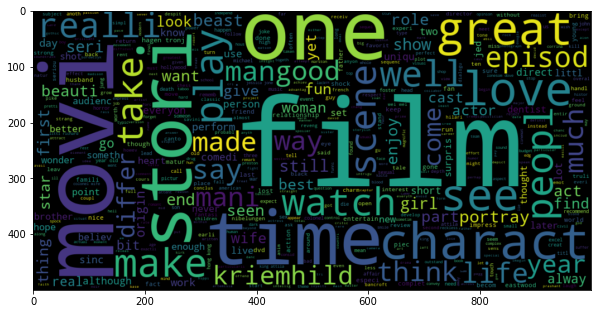

In [138]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_text_pos
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show()

In [147]:
# All negative reviews
norm_text_neg=""
for i in range(0,100):
    if(df.iloc[i].sentiment==0):
        norm_text_neg+=df.iloc[i].review
len(norm_text_neg)

35510

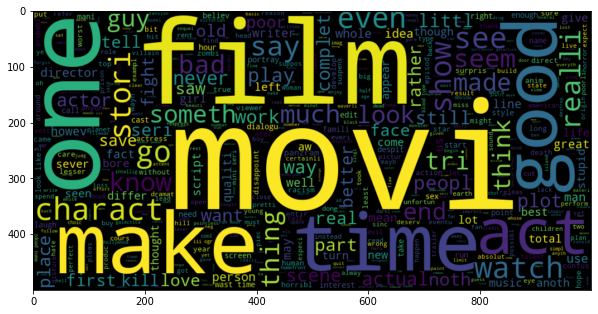

In [140]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_text_neg
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show()

## Conclusion:

### 1. We can observed that both Gaussian naive bayes and Multinomial naive bayes model performing well compared to Bernoulli naive bayes.

### 2. We can also use other different classification algorithms to see which one predicts best.